In [48]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [49]:
pkl_file_path = "../normalization_params.pkl"
with open(pkl_file_path, 'rb') as file:
    normalization_params = pickle.load(file)
    recovered_max_val = normalization_params["max_val"]
    recovered_min_val = normalization_params["min_val"]

In [50]:
google = pd.read_csv("GOOGLE_BIG_last_24.csv")

In [51]:
pred = pd.read_csv("forecast_output_1.csv")

In [52]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
0,1155.719971,1156.755005,1134.910034,1143.300049,1143.300049,1166100
1,1126.729980,1147.079956,1123.300049,1142.319946,1142.319946,1212400
2,1144.449951,1176.189941,1144.449951,1175.760010,1175.760010,1719200
3,1178.260010,1200.000000,1178.260010,1193.199951,1193.199951,2013100
4,1200.645020,1200.930054,1191.939941,1193.319946,1193.319946,1435900


In [53]:
pred.head()

,Open,High,Low,Close,Adj Close,Volume
0,1132.966736,1152.334850,1128.544786,1147.856510,1147.764415,922893.385285
1,1149.154837,1164.410612,1141.340554,1159.399513,1158.954114,831138.754936
2,1160.559960,1173.986601,1153.578498,1172.121775,1171.533543,829581.517308
3,1169.325375,1181.446180,1162.272489,1180.123750,1180.231414,829488.892828
4,1182.216299,1191.382744,1173.875176,1189.100028,1191.165529,829685.525821


In [55]:
off_by = google.iloc[0][0] - pred.iloc[0][0]

/var/folders/fz/6jqrkhfj6mj715w4gn4yjt080000gn/T/ipykernel_74302/1478051137.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  off_by = google.iloc[0][0] - pred.iloc[0][0]


In [56]:
pred["Open"] += off_by

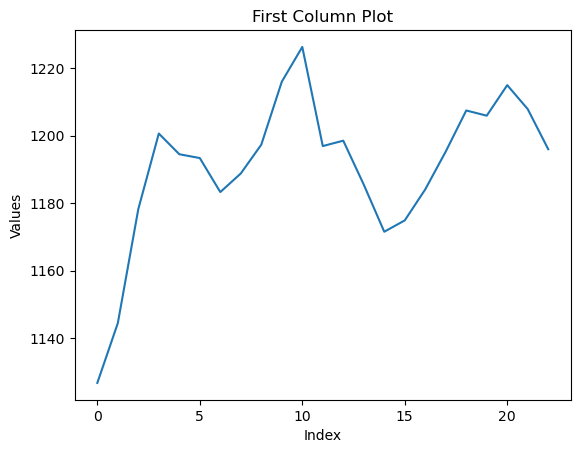

In [44]:
plt.plot(google.iloc[:, 0])  # Use .iloc to select the first column
plt.title("First Column Plot")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

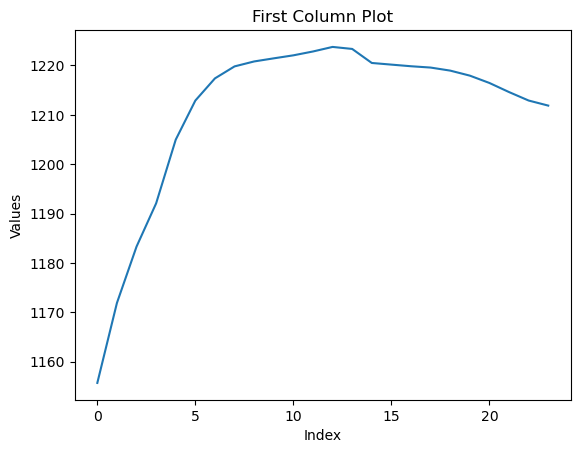

In [57]:
plt.plot(pred.iloc[:, 0])  # Use .iloc to select the first column
plt.title("First Column Plot")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

In [60]:
google_first_column = google.iloc[:, 0]
pred_first_column = pred.iloc[:, 0]
combined_max = max(google_first_column.max(), pred_first_column.max())
combined_min = min(google_first_column.min(), pred_first_column.min())
value_range = combined_max - combined_min

# Compute the Mean Absolute Difference (MAD) and normalize it
normalized_difference = (abs(google_first_column - pred_first_column).mean()) / value_range

In [61]:
normalized_difference

0.22095273852771707